In [14]:
# Loading in the Libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import gamma

# Allows for the hot reloading of modules
%load_ext autoreload
%autoreload 2

# Loading in the Simulation Objects
from src.Centrifugation import *
from src.DataLoader import load_data_from_txt, normalize_data, load_data_from_excel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [189]:
# Centrifugation parms
duration = 10 # (min)
arm_length = 10 * 1e-2 # length of centrifuge 10cm  (m)
length = 1 * 1e-2 # tube length 1cm (m)

# Liquid parms
liquid_density = 997 # water (kg/m^2)
liquid_viscosity = 1 # water (mPa.s)

# Particle parms
particle_density = 2330 # silicon (kg.m^2)

    Radii(nm)       Raw           2kp       4kp
0          10  0.001426  3.706967e-04  0.000953
1          20  0.000023  1.461382e-06  0.000009
2          30  0.000016  2.531706e-07  0.000008
3          40  0.002224  1.788848e-07  0.114890
4          50  0.453205  3.688587e-07  0.000067
5          60  0.266709  5.317645e-01  0.500936
6          70  0.165469  2.359044e-05  0.104664
7          80  0.037084  1.541846e-01  0.087686
8          90  0.024373  1.079070e-01  0.079994
9         100  0.030784  1.104010e-01  0.075967
10        110  0.014018  7.548967e-02  0.021689
11        120  0.004439  1.860746e-05  0.005273
12        130  0.000228  1.983807e-02  0.007828
13        140  0.000001  4.659171e-08  0.000036


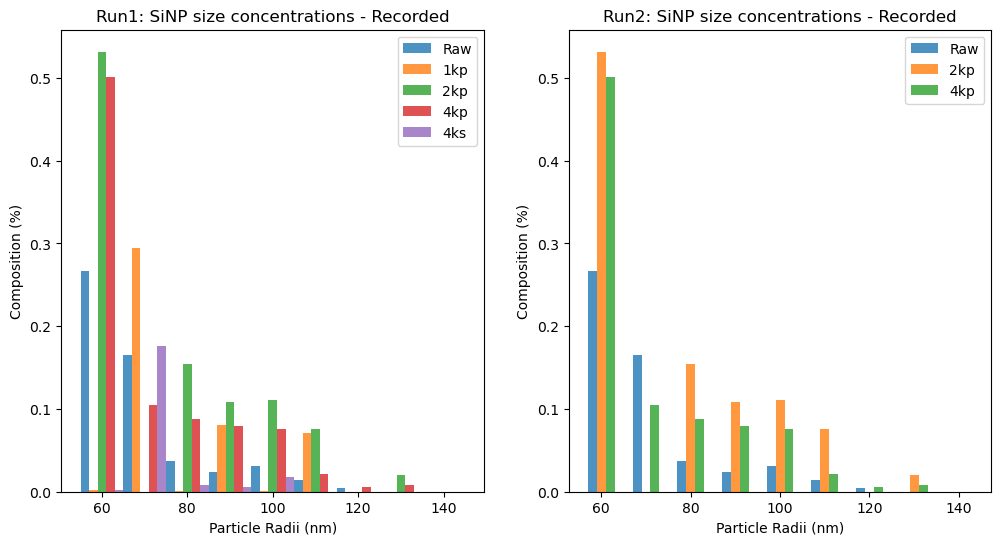

In [166]:
# Importing the data
data = load_data_from_excel('/Users/william/Developer/Nano-Particle-Playground/data/Centrifugation/centrifugation_2023.xlsx', load_all_sheets=True)
run1 = data['run1']
run2 = data['run2']

fig = plot_centrifuge_data(run1, run2, mask_limit=50, bar_width = 2)
print(run2)

0.0


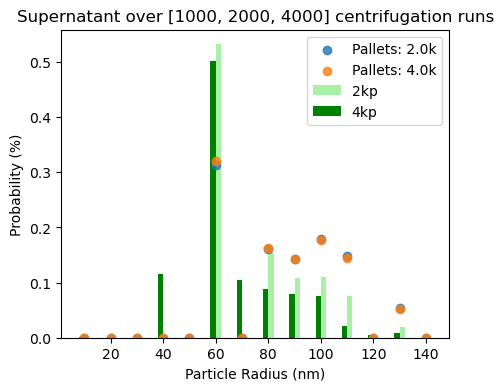

In [201]:
# How does the recorded size distribution change over time compared to the model?
mask = run1['Radii(nm)'] > 0

runs = [1000, 2000, 4000]
count = len(run2['Radii(nm)'][mask])
size = run2['Radii(nm)'][mask].to_numpy() * 1e-9

prob = run2['2kp'][mask].to_numpy()


pallets = np.zeros(count)

fig, ax = plt.subplots(figsize=(5,4))

ax.bar(size*1e9 + 1, prob, label=f"2kp", alpha = 0.8, width=2, color='lightgreen')
# ax.bar(size*1e9, run2['2kp'][mask].to_numpy(), color = 'green', label='2kp', width=2)
ax.bar(size*1e9 -1, run2['4kp'][mask].to_numpy(), color = 'green', label='4kp', width=2)

print(sum(pallets))

 
for RPM in runs:
    prob_hold = prob.copy()
    pallets_hold = pallets.copy()
    
    for i in range(count):
        prob[i], pallets[i] = cal_supernate_and_pallets(size[i], prob[i], duration,
                                              particle_density, liquid_density, liquid_viscosity,
                                             RPM, arm_length, length) 
    # Normalising the calcuated values
#     prob = prob / sum(prob)
#     pallets = pallets / sum(pallets)
    if RPM != 1000:
        ax.scatter(size*1e9, pallets/sum(pallets), label=f"Pallets: {RPM/1000}k", alpha =0.8)
      

        
ax.plot(size*1e9, prob/sum(prob), label=f"supernate: {RPM/1000}k", alpha = 0.8, linewidth=2, linestyle="-.")


    
# ax.set_xlim([0,250])
# ax.set_ylim([0,0.3])

ax.set_xlabel("Particle Radius (nm)")
ax.set_ylabel("Probability (%)")
ax.set_title(f"Supernatant over {runs} centrifugation runs")
# ax.set_xlim([50,None])
ax.legend()

In [122]:
sum(run2['4kp'][mask].to_numpy())

0.9999999999999982

[0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53
 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53
 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53
 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53
 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53
 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53
 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53 0.53
 0.53 0.53]


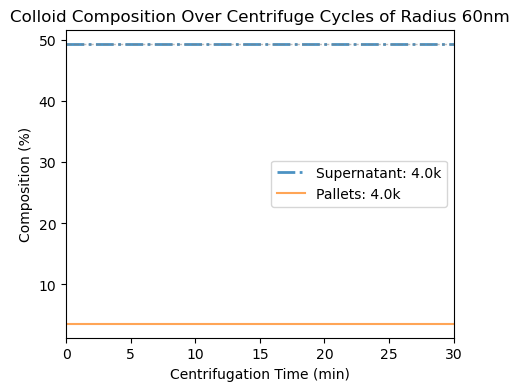

In [194]:
# Pallets and supernatants
size = 60 * 1e-9
rpm = [4000]
runs = 1 

prob = np.ones(100) * 0.53
pallet=0

# Define a color cycle for different runs
colors = ['red', 'blue', 'green']

fig, ax = plt.subplots(figsize=(5,4))
for RPM in rpm:
    time = np.linspace(0,30,100)
    supernate, pallet = cal_supernate_and_pallets(size, prob, duration,
                                            particle_density, liquid_density, liquid_viscosity,
                                            RPM, arm_length, length)
    print(prob)
    prob = supernate[-1]
    ax.plot(time, supernate * 1e2, label=f"Supernatant: {RPM/1000}k", alpha = 0.8, linewidth=2, linestyle='-.') 
    ax.plot(time, pallet * 1e2, label=f"Pallets: {RPM/1000}k", alpha=0.7)

    # Add a gray dotted line at y=prob
    ax.axhline(y=prob * 1e2, color='gray', linestyle='--', linewidth=1, alpha=0.5)

# ax.set_ylim([0,100])
ax.set_xlim([0,time[-1]])

ax.set_xlabel("Centrifugation Time (min)")
ax.set_ylabel("Composition (%)")
ax.set_title(f'Colloid Composition Over Centrifuge Cycles of Radius {size * 1e9:.0f}nm')
ax.legend()

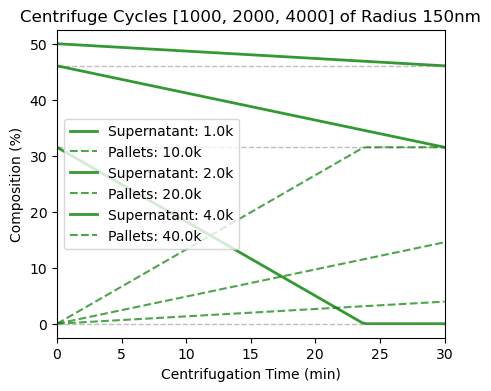

In [208]:
# Pallets and supernatants
size = 150 * 1e-9
rpms = [1000, 2000, 4000]

# The inital prob
prob = 0.50

# Define a color cycle for different runs
colors = ['red', 'blue', 'green']

fig, ax = plt.subplots(figsize=(5,4))
for rpm in rpms:
    time = np.linspace(0,30,100)
    supernate, pallets = cal_supernate_and_pallets(size, prob, time,
                                            particle_density, liquid_density, liquid_viscosity,
                                            rpm, arm_length, length)
    probs = supernate[-1]
    ax.plot(time, supernate * 1e2, label=f"Supernatant: {rpm/1000}k", alpha = 0.8, linewidth=2, color=colors[run]) 
    ax.plot(time, pallets * 1e2, label=f"Pallets: {rpm/100}k", alpha=0.7, linestyle='--', color=colors[run])

    # Add a gray dotted line at y=prob
    ax.axhline(y=probs * 1e2, color='gray', linestyle='--', linewidth=1, alpha=0.5)
    super_norm = supernate #/ sum(supernate)
    prob = super_norm[-1]
    

# ax.set_ylim([0,100])
ax.set_xlim([0,time[-1]])

ax.set_xlabel("Centrifugation Time (min)")
ax.set_ylabel("Composition (%)")
ax.set_title(f'Centrifuge Cycles {rpms} of Radius {size * 1e9:.0f}nm')
ax.legend()


need to change/create a function the will return the reduction percent --> this can then be hit on to the existing composition %s and then the pallets and supernates can be normalised


No the normalisation need to be done before the reduction on each end.... or does it happend after-> I think after beacuse the data from the experimental reults are all noramlised to the % compositions. fuck me why are ratios of ratios so hard!!!!